In [24]:
import os
import numpy as np
print("numpy version: ", np.__version__)
import matplotlib.pyplot as plt
import librosa
import audiofile as af
import json
import soundfile as sf
import pandas as pd

numpy version:  1.26.4


In [25]:
def read_json_files(directory):
    json_files = [f for f in os.listdir(directory) if f.endswith('.json')]

    list_of_dicts = []
    

    # Loop through each JSON file and load its content into the dictionary
    for json_file in json_files:
        file_path = os.path.join(directory, json_file)
        with open(file_path, 'r', encoding='utf-8') as f:
            data_dict = {}
            data = json.load(f)
            data_dict[json_file] = data
            list_of_dicts.append(data_dict)

    return json_files,data_dict,list_of_dicts

# Specify your directory here
directory_path = 'train_classification_json'
_,_,train_json_list = read_json_files(directory_path)

# print(len(lala))
print(len(train_json_list))
print(train_json_list[5])

1949
{'41283394_2.8_1_p4_2814.json': {'record_annotation': 'Normal', 'event_annotation': [{'start': '1405', 'end': '2683', 'type': 'Normal'}, {'start': '2827', 'end': '4142', 'type': 'Normal'}, {'start': '4250', 'end': '5728', 'type': 'Normal'}, {'start': '5894', 'end': '7153', 'type': 'Normal'}, {'start': '7686', 'end': '9075', 'type': 'Normal'}]}}


In [26]:
# Specify your directory here
directory_path = 'test_classification_json/2022/inter_test_json'
_,_,inter_test_json_list = read_json_files(directory_path)
print(len(inter_test_json_list))

# Specify your directory here
directory_path = 'test_classification_json/2022/intra_test_json'
_,_,intra_test_json_list = read_json_files(directory_path)
print(len(intra_test_json_list))

def get_wav_files(directory):
    wav_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.wav')]
    return wav_files

train_wav_list=get_wav_files('train_classification_wav')
print(len(train_wav_list))
test_wav_list=get_wav_files('test_classification_wav/2022')
print(len(test_wav_list))

355
379
1949
734


In [27]:
# get the list of wav files
def get_wav_files(directory):
    wav_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.wav')]
    return wav_files

train_wav_list=get_wav_files('train_classification_wav_4k')
print(len(train_wav_list))

test_wav_list=get_wav_files('test_classification_wav_4k')
print(len(test_wav_list))
# check the sampling rate of one of the files
# read a wav file using audiofile
y, sr = af.read(train_wav_list[2])
print(sr)


1949
734
4000


In [28]:
# calculae the duration of the wav files without using librosa
def get_duration(wav_file):
    with open(wav_file, 'rb') as f:
        f.seek(0, 2)
        num_frames = int(f.tell()/2)
        duration = num_frames / 4000
    return duration

# calculate the duration of all the wav files
def get_durations(wav_files):
    durations = []
    for wav_file in wav_files:
        duration = get_duration(wav_file)
        durations.append(duration)
    return durations

train_durations = get_durations(train_wav_list)
test_durations = get_durations(test_wav_list)

print("The mean duration of the training files is: ", np.mean(train_durations))
print("The mean duration of the test files is: ", np.mean(test_durations))

print("The max duration of the training files is: ", np.max(train_durations))
print("The max duration of the test files is: ", np.max(test_durations))

print("The min duration of the training files is: ", np.min(train_durations))
print("The min duration of the test files is: ", np.min(test_durations))

The mean duration of the training files is:  10.849685608004101
The mean duration of the test files is:  11.244708787465939
The max duration of the training files is:  15.3655
The max duration of the test files is:  15.3655
The min duration of the training files is:  0.30975
The min duration of the test files is:  9.18975


In [ ]:
from scipy.io import wavfile

# Pre-normalization in the time domain was used to scale each signal to an amplitude of ±0.5 and a mean of 0.
def normalize_signal(signal):
    # Center the signal by subtracting the mean
    centered_signal = signal - np.mean(signal)
    
    # Scale the signal to have an amplitude of ±0.5
    max_amplitude = np.max(np.abs(centered_signal))
    normalized_signal = 0.5 * centered_signal / max_amplitude
    
    return normalized_signal

def process_wav_files(wav_files):
    for wav_file in wav_files:
        # Read the WAV file
        sampling_rate, signal = wavfile.read(wav_file)
        
        # Normalize the signal
        normalized_signal = normalize_signal(signal)
        
        # Write the normalized signal back to a WAV file
        wavfile.write(wav_file, sampling_rate, normalized_signal.astype(np.float32))
        print(f"Processed {wav_file}")

process_wav_files(train_wav_list)

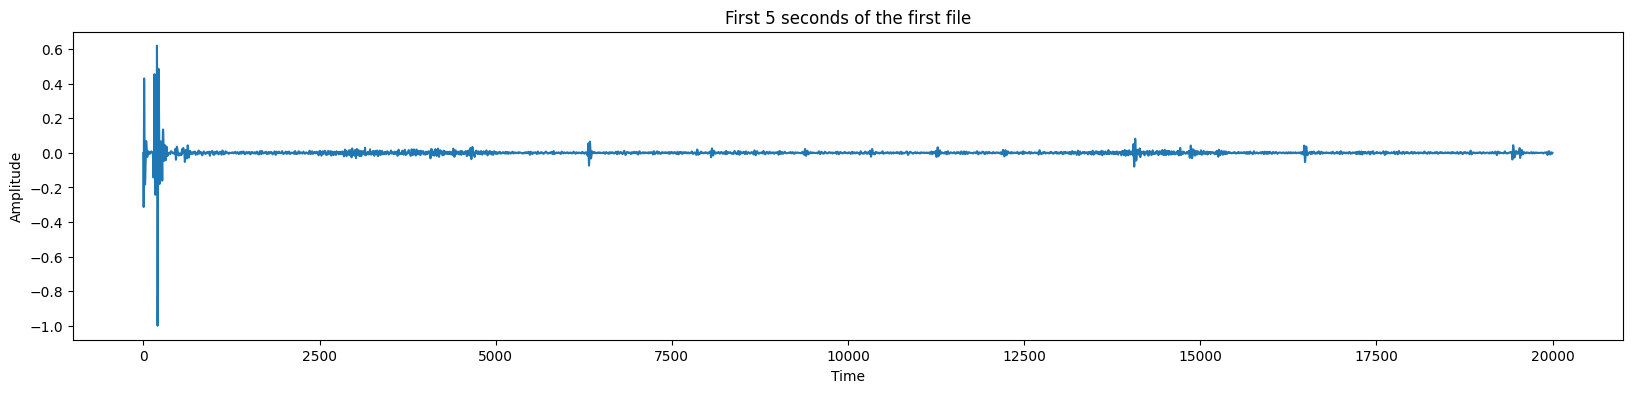

In [29]:
# # normalize the wav files between -1 and 1
# def normalize_wav(wav_file):
#     y, sr = af.read(wav_file)
#     y = y / np.max(np.abs(y))
#     return y

# # normalize all the wav files
# def normalize_wavs(wav_files):
#     normalized_wavs = []
#     for wav_file in wav_files:
#         y = normalize_wav(wav_file)
#         normalized_wavs.append(y)
#     return normalized_wavs

# train_normalized = normalize_wavs(train_wav_list)

# # plot the first 5 seconds of the first file
# plt.figure(figsize=(20, 4))
# plt.plot(train_normalized[0][:20000])
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.title('First 5 seconds of the first file')
# plt.show()

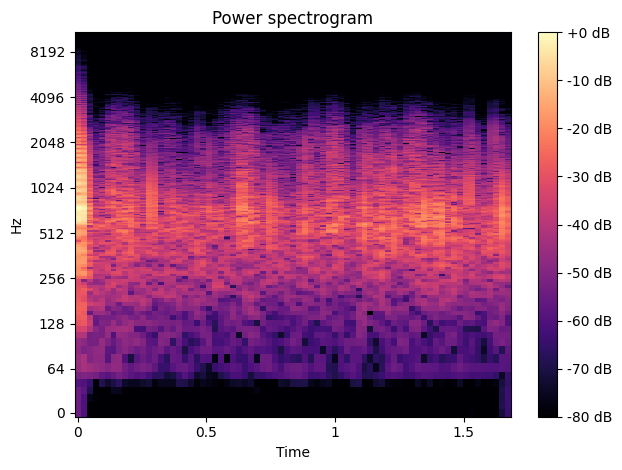

In [30]:
# cut off frequencies above 4 kHz

